In [327]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
classes = pd.read_csv("Desktop/data/classes.csv")
discount = pd.read_csv("Desktop/data/discount.csv")
enrollment = pd.read_csv("Desktop/data/enrollment.csv")
transfer_class = pd.read_csv("Desktop/data/transferclass.csv")
guest_user = pd.read_csv("Desktop/data/guestuser.csv")
sales_order = pd.read_csv("Desktop/data/salesorder.csv")
cart = pd.read_csv("Desktop/data/shoppingcartitem.csv")
users = pd.read_csv("Desktop/data/users.csv")

In [329]:
classes.head()

,classid,classname,classstarttime,classendtime,classteacher,classlocation,classcost,classtotalstudent,classadddate,classavailable,classtag
0,42,TXT YEONJUN & HUENINGKAI - THE DEVIL I KNOW,19:30,21:30,A,Studio 2,16,30,8/23/2023,yes,class03
1,43,ITZY | CAKE,13:00,15:00,B,Studio 2,16,30,8/26/2023,yes,class03
2,45,NCT 127 | LIMITLESS,13:00,15:00,B,Studio 2,16,30,8/27/2023,yes,class03
3,46,RIIZE | SIREN,15:30,17:30,A,Studio 2,16,30,8/27/2023,yes,class03
4,47,A CHOREOGRAPHY,19:30,21:00,A,Studio 2,12,30,8/24/2023,yes,class07


In [330]:
classes.shape

(233, 11)

In [331]:
classes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   classid            233 non-null    int64 
 1   classname          233 non-null    object
 2   classstarttime     233 non-null    object
 3   classendtime       233 non-null    object
 4   classteacher       233 non-null    object
 5   classlocation      233 non-null    object
 6   classcost          233 non-null    int64 
 7   classtotalstudent  233 non-null    int64 
 8   classadddate       233 non-null    object
 9   classavailable     233 non-null    object
 10  classtag           233 non-null    object
dtypes: int64(3), object(8)
memory usage: 20.2+ KB


In [332]:
classes.isnull().sum()

classid              0
classname            0
classstarttime       0
classendtime         0
classteacher         0
classlocation        0
classcost            0
classtotalstudent    0
classadddate         0
classavailable       0
classtag             0
dtype: int64

In [333]:
transfer_class.head()

,transferclassid,classcreditenrollmentid,transferenrollmentid,transferreason,transferamountvalue,transferdaterequest,transfercreditexpire,transferstatus
0,1,2.0,1,I can no longer make this date/time.,16.0,2023-08-23 16:07:35,2023-11-23 16:07:35,Used
1,2,43.0,8,I can no longer make this date/time.,16.0,2023-08-27 19:35:11,2023-11-27 19:35:11,Used
2,3,256.0,63,Class Canceled,16.0,2023-09-03 01:35:26,2023-12-03 01:35:27,Used
3,4,NaN,14,I can no longer make this date/time.,16.0,2023-09-06 21:36:35,2023-12-06 21:36:35,not used
4,5,100.0,75,Admin Transfer,16.0,2023-09-09 22:28:16,2023-12-09 22:28:16,Used


In [334]:
transfer_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transferclassid          80 non-null     int64  
 1   classcreditenrollmentid  37 non-null     float64
 2   transferenrollmentid     80 non-null     int64  
 3   transferreason           78 non-null     object 
 4   transferamountvalue      80 non-null     float64
 5   transferdaterequest      80 non-null     object 
 6   transfercreditexpire     80 non-null     object 
 7   transferstatus           80 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ KB


In [335]:
transfer_class.isnull().sum()

transferclassid             0
classcreditenrollmentid    43
transferenrollmentid        0
transferreason              2
transferamountvalue         0
transferdaterequest         0
transfercreditexpire        0
transferstatus              0
dtype: int64

In [336]:
transfer_class["classcreditenrollmentid"] = transfer_class["classcreditenrollmentid"].fillna(transfer_class["classcreditenrollmentid"].mode())

In [337]:
transfer_class.shape

(80, 8)

In [338]:
discount.head()

,discountid,discounttype,discounttypevalue,discountamounttype,discountamountvalue,discountcode,discountdateexpire,discountmaxuse
0,1,over amount paid,16.0,reduce by percentage,100.0,0ESY7U,2023-09-22 00:00:00,10
1,2,over amount paid,16.0,reduce by percentage,100.0,J6P8DY,2023-10-07 00:00:00,7
2,3,over amount paid,16.0,reduce by percentage,100.0,HTZEW4,2023-11-10 00:00:00,4
3,4,over amount paid,16.0,reduce by percentage,100.0,M1VHEI,2023-10-27 00:00:00,2
4,5,over amount paid,16.0,reduce by percentage,100.0,Y0QDZB,2023-10-14 00:00:00,2


In [339]:
discount.shape

(50, 8)

In [340]:
discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   discountid           50 non-null     int64  
 1   discounttype         50 non-null     object 
 2   discounttypevalue    50 non-null     float64
 3   discountamounttype   50 non-null     object 
 4   discountamountvalue  50 non-null     float64
 5   discountcode         50 non-null     object 
 6   discountdateexpire   50 non-null     object 
 7   discountmaxuse       50 non-null     int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.3+ KB


In [341]:
enrollment.head()

,enrollmentid,enrollmentstudentid,salesorderid,enrollmentclassid,enrollmentcheckinstatus,enrollmentcheckindate,enrollmentclasspaid,enrollmentstatus
0,1,690037110,1,61,No,0000-00-00 00:00:00,16.0,Transfered
1,2,690037110,2,62,No,0000-00-00 00:00:00,0.0,Credited
2,3,714878286,3,60,YES,2023-09-03 15:21:17,16.0,Finished
3,4,157747870,4,42,YES,2023-08-23 19:24:59,16.0,Finished
4,5,811296478,5,57,YES,2023-09-02 12:46:46,16.0,Finished


In [342]:
enrollment.shape

(1804, 8)

In [343]:
discount.shape

(50, 8)

In [344]:
guest_user.shape

(3236, 2)

In [345]:
guest_user.head()

,guestuserid,guestjointime
0,100077687,2024-01-15 20:13:54
1,100243970,2023-12-20 18:42:12
2,100411531,2024-02-23 21:01:24
3,100654307,2024-01-14 16:52:05
4,101105308,2023-11-24 13:06:01


In [346]:
sales_order.head()

,salesorderid,salesorderstudentid,shoppingcartid,discountid,orderdate,creditcardapprovalstatus,approvaltime,totalamountbeforediscount,bundlediscount,coupondiscount,giftcarddiscount,classcredit,totalamountpaid
0,1,690037110,qkvt9dp61up1cigneh56bq4fdm,0,2023-08-23 13:52:00,Succeeded,2023-08-23 13:52:10,16.0,0.0,0.0,0.0,0.0,16.0
1,2,690037110,6o1r9gl3ini1ja2t2cklqp6fna,0,2023-08-23 16:11:51,Transfer Credit Only,NaN,16.0,0.0,0.0,0.0,16.0,0.0
2,3,714878286,87fc1t4dhsqb850pcfj25cjvum,0,2023-08-23 18:39:50,Succeeded,2023-08-23 18:40:01,16.0,0.0,0.0,0.0,0.0,16.0
3,4,157747870,004520g1lc6q3o9stknte19pao,0,2023-08-23 19:07:23,Succeeded,2023-08-23 19:07:32,16.0,0.0,0.0,0.0,0.0,16.0
4,5,811296478,1lnhgh477oapo3kveg5ka64tfb,0,2023-08-24 08:54:38,Succeeded,2023-08-24 08:54:48,16.0,0.0,0.0,0.0,0.0,16.0


In [347]:
sales_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salesorderid               1420 non-null   int64  
 1   salesorderstudentid        1420 non-null   int64  
 2   shoppingcartid             1420 non-null   object 
 3   discountid                 1420 non-null   int64  
 4   orderdate                  1420 non-null   object 
 5   creditcardapprovalstatus   1420 non-null   object 
 6   approvaltime               1323 non-null   object 
 7   totalamountbeforediscount  1420 non-null   float64
 8   bundlediscount             1420 non-null   float64
 9   coupondiscount             1420 non-null   float64
 10  giftcarddiscount           1420 non-null   float64
 11  classcredit                1420 non-null   float64
 12  totalamountpaid            1420 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage:

In [348]:
users.shape

(428, 7)

In [349]:
users.head(10)

,userid,usergender,userdob,ads,referralcode,usertype,userjoindate
0,3,w,1996-04-18,friends,NaN,Student,2023-08-24 11:37:14
1,4,w,2004-07-03,instagram,NaN,Student,2023-08-24 15:43:43
2,5,w,1999-11-03,searchengine,NaN,Student,2023-08-24 20:41:03
3,6,w,2005-12-02,friends,NaN,Student,2023-08-25 10:06:20
4,7,w,2002-06-18,instagram,NaN,Student,2023-08-25 11:07:51
5,8,w,1995-08-29,searchengine,NaN,Student,2023-08-26 03:41:59
6,9,w,1999-01-12,searchengine,NaN,Student,2023-08-26 11:03:44
7,10,w,2000-11-17,instagram,NaN,Student,2023-08-26 18:30:23
8,11,w,1999-10-05,instagram,NaN,Student,2023-08-26 20:47:48
9,12,w,0000-00-00,searchengine,NaN,Student,2023-08-28 15:16:03


In [350]:
cart.head()

,shoppingcartitemid,shoppingcartitemstudentid,shoppingcartitemclassid,shoppingcartitemquantity,shoppingcartid,shoppingcartaddtime
0,1,479576454,42,1,897bl1f82eaahgmbjd1u2u4kdl,2023-08-23 13:21:56
1,2,790956021,63,1,1in2453aun3dcpcm1mdu7ondo7,2023-08-23 13:22:30
2,4,690037110,61,1,qkvt9dp61up1cigneh56bq4fdm,2023-08-23 13:50:27
3,5,153708469,62,1,p5jhaqpv9noh2sr904mvr78uuu,2023-08-23 14:43:08
4,6,714878286,60,1,87fc1t4dhsqb850pcfj25cjvum,2023-08-23 15:42:55


In [351]:
cart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   shoppingcartitemid         3202 non-null   int64 
 1   shoppingcartitemstudentid  3202 non-null   int64 
 2   shoppingcartitemclassid    3202 non-null   int64 
 3   shoppingcartitemquantity   3202 non-null   int64 
 4   shoppingcartid             3202 non-null   object
 5   shoppingcartaddtime        3202 non-null   object
dtypes: int64(4), object(2)
memory usage: 150.2+ KB


In [352]:
class_and_cart = pd.merge(classes,cart,left_on="classid",right_on="shoppingcartitemclassid",how="inner")

In [353]:
class_and_cart.shape

(3153, 17)

In [354]:
class_enrollment = class_and_cart.groupby("classid")["shoppingcartitemquantity"].sum().reset_index()

In [355]:
classes['classendtime'] = pd.to_datetime(classes['classendtime'])
classes['classstarttime'] = pd.to_datetime(classes['classstarttime'])
classes["class_duration"] =  (classes['classendtime'] - classes['classstarttime']).dt.total_seconds()/3600

In [356]:
classes['day_of_week'] = classes['classstarttime'].dt.weekday.astype(int)


In [357]:
classes["classteacher"].value_counts()

C    118
A     41
B     37
D     25
E     11
F      1
Name: classteacher, dtype: int64

In [358]:
master_df = pd.get_dummies(classes, columns=['classteacher'])


In [359]:
master_df

,classid,classname,classstarttime,classendtime,classlocation,classcost,classtotalstudent,classadddate,classavailable,classtag,class_duration,day_of_week,classteacher_A,classteacher_B,classteacher_C,classteacher_D,classteacher_E,classteacher_F
0,42,TXT YEONJUN & HUENINGKAI - THE DEVIL I KNOW,2024-12-07 19:30:00,2024-12-07 21:30:00,Studio 2,16,30,8/23/2023,yes,class03,2.0,5,1,0,0,0,0,0
1,43,ITZY | CAKE,2024-12-07 13:00:00,2024-12-07 15:00:00,Studio 2,16,30,8/26/2023,yes,class03,2.0,5,0,1,0,0,0,0
2,45,NCT 127 | LIMITLESS,2024-12-07 13:00:00,2024-12-07 15:00:00,Studio 2,16,30,8/27/2023,yes,class03,2.0,5,0,1,0,0,0,0
3,46,RIIZE | SIREN,2024-12-07 15:30:00,2024-12-07 17:30:00,Studio 2,16,30,8/27/2023,yes,class03,2.0,5,1,0,0,0,0,0
4,47,A CHOREOGRAPHY,2024-12-07 19:30:00,2024-12-07 21:00:00,Studio 2,12,30,8/24/2023,yes,class07,1.5,5,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,307,SEVENTEEN | LEFT & RIGHT,2024-12-07 13:00:00,2024-12-07 14:30:00,Studio 1,12,20,3/23/2024,yes,class02,1.5,5,0,0,1,0,0,0
229,308,K-FIT,2024-12-07 11:00:00,2024-12-07 12:00:00,Studio 2,10,20,3/30/2024,yes,class08,1.0,5,0,0,1,0,0,0
230,309,BLACKINK | PLAYING WITH FIRE,2024-12-07 13:00:00,2024-12-07 14:30:00,Studio 1,12,20,3/30/2024,yes,class02,1.5,5,0,0,1,0,0,0
231,310,A CHOREO,2024-12-07 19:30:00,2024-12-07 21:00:00,Studio 2,12,20,3/7/2024,yes,class07,1.5,5,1,0,0,0,0,0


In [360]:

master_df.columns

Index(['classid', 'classname', 'classstarttime', 'classendtime',
       'classlocation', 'classcost', 'classtotalstudent', 'classadddate',
       'classavailable', 'classtag', 'class_duration', 'day_of_week',
       'classteacher_A', 'classteacher_B', 'classteacher_C', 'classteacher_D',
       'classteacher_E', 'classteacher_F'],
      dtype='object')

In [361]:
master_df.head()

,classid,classname,classstarttime,classendtime,classlocation,classcost,classtotalstudent,classadddate,classavailable,classtag,class_duration,day_of_week,classteacher_A,classteacher_B,classteacher_C,classteacher_D,classteacher_E,classteacher_F
0,42,TXT YEONJUN & HUENINGKAI - THE DEVIL I KNOW,2024-12-07 19:30:00,2024-12-07 21:30:00,Studio 2,16,30,8/23/2023,yes,class03,2.0,5,1,0,0,0,0,0
1,43,ITZY | CAKE,2024-12-07 13:00:00,2024-12-07 15:00:00,Studio 2,16,30,8/26/2023,yes,class03,2.0,5,0,1,0,0,0,0
2,45,NCT 127 | LIMITLESS,2024-12-07 13:00:00,2024-12-07 15:00:00,Studio 2,16,30,8/27/2023,yes,class03,2.0,5,0,1,0,0,0,0
3,46,RIIZE | SIREN,2024-12-07 15:30:00,2024-12-07 17:30:00,Studio 2,16,30,8/27/2023,yes,class03,2.0,5,1,0,0,0,0,0
4,47,A CHOREOGRAPHY,2024-12-07 19:30:00,2024-12-07 21:00:00,Studio 2,12,30,8/24/2023,yes,class07,1.5,5,1,0,0,0,0,0


In [362]:
master_df.head()

,classid,classname,classstarttime,classendtime,classlocation,classcost,classtotalstudent,classadddate,classavailable,classtag,class_duration,day_of_week,classteacher_A,classteacher_B,classteacher_C,classteacher_D,classteacher_E,classteacher_F
0,42,TXT YEONJUN & HUENINGKAI - THE DEVIL I KNOW,2024-12-07 19:30:00,2024-12-07 21:30:00,Studio 2,16,30,8/23/2023,yes,class03,2.0,5,1,0,0,0,0,0
1,43,ITZY | CAKE,2024-12-07 13:00:00,2024-12-07 15:00:00,Studio 2,16,30,8/26/2023,yes,class03,2.0,5,0,1,0,0,0,0
2,45,NCT 127 | LIMITLESS,2024-12-07 13:00:00,2024-12-07 15:00:00,Studio 2,16,30,8/27/2023,yes,class03,2.0,5,0,1,0,0,0,0
3,46,RIIZE | SIREN,2024-12-07 15:30:00,2024-12-07 17:30:00,Studio 2,16,30,8/27/2023,yes,class03,2.0,5,1,0,0,0,0,0
4,47,A CHOREOGRAPHY,2024-12-07 19:30:00,2024-12-07 21:00:00,Studio 2,12,30,8/24/2023,yes,class07,1.5,5,1,0,0,0,0,0


In [364]:
master_df.head()

,classid,classname,classstarttime,classendtime,classlocation,classcost,classtotalstudent,classadddate,classavailable,classtag,class_duration,day_of_week,classteacher_A,classteacher_B,classteacher_C,classteacher_D,classteacher_E,classteacher_F
0,42,TXT YEONJUN & HUENINGKAI - THE DEVIL I KNOW,2024-12-07 19:30:00,2024-12-07 21:30:00,Studio 2,16,30,8/23/2023,yes,class03,2.0,5,1,0,0,0,0,0
1,43,ITZY | CAKE,2024-12-07 13:00:00,2024-12-07 15:00:00,Studio 2,16,30,8/26/2023,yes,class03,2.0,5,0,1,0,0,0,0
2,45,NCT 127 | LIMITLESS,2024-12-07 13:00:00,2024-12-07 15:00:00,Studio 2,16,30,8/27/2023,yes,class03,2.0,5,0,1,0,0,0,0
3,46,RIIZE | SIREN,2024-12-07 15:30:00,2024-12-07 17:30:00,Studio 2,16,30,8/27/2023,yes,class03,2.0,5,1,0,0,0,0,0
4,47,A CHOREOGRAPHY,2024-12-07 19:30:00,2024-12-07 21:00:00,Studio 2,12,30,8/24/2023,yes,class07,1.5,5,1,0,0,0,0,0


In [254]:
master_df.columns

Index(['classid', 'classname', 'classstarttime', 'classendtime',
       'classlocation', 'classcost', 'classtotalstudent', 'classadddate',
       'classavailable', 'classtag', 'class_duration', 'day_of_week',
       'classteacher_A', 'classteacher_B', 'classteacher_C', 'classteacher_D',
       'classteacher_E', 'classteacher_F'],
      dtype='object')

In [368]:
master_df.drop("day_of_week",axis=1,inplace=True)

/var/folders/bl/sppk_tys67zdqw5c_b_tr3mc0000gn/T/ipykernel_1238/345748086.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(master_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


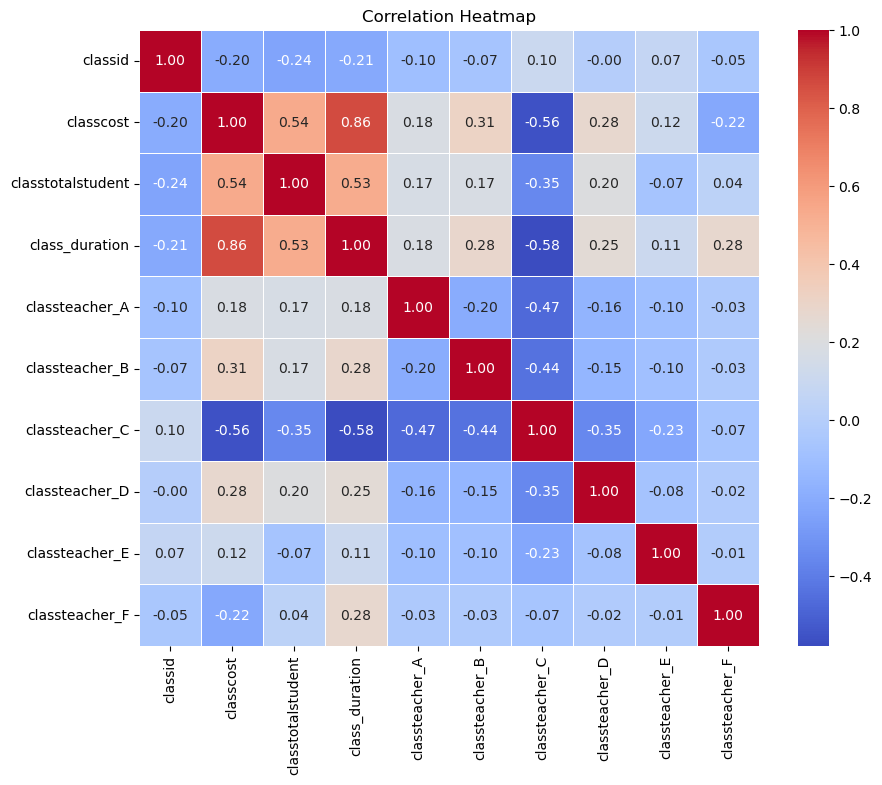

In [369]:
plt.figure(figsize=(10, 8))
sns.heatmap(master_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [255]:
master_df.corr()

/var/folders/bl/sppk_tys67zdqw5c_b_tr3mc0000gn/T/ipykernel_1238/2013207339.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  master_df.corr()


,classid,classcost,classtotalstudent,class_duration,day_of_week,classteacher_A,classteacher_B,classteacher_C,classteacher_D,classteacher_E,classteacher_F
classid,1.000000,-0.199011,-0.237446,-0.213486,NaN,-0.098754,-0.068879,0.104807,-0.004885,0.071691,-0.050689
classcost,-0.199011,1.000000,0.537260,0.862403,NaN,0.182371,0.311242,-0.558512,0.276489,0.116752,-0.218746
classtotalstudent,-0.237446,0.537260,1.000000,0.526465,NaN,0.168504,0.174246,-0.354661,0.201120,-0.071990,0.038087
class_duration,-0.213486,0.862403,0.526465,1.000000,NaN,0.182146,0.280177,-0.578503,0.245490,0.110264,0.276956
day_of_week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classteacher_A,-0.098754,0.182371,0.168504,0.182146,NaN,1.000000,-0.200777,-0.468094,-0.160206,-0.102863,-0.030339
classteacher_B,-0.068879,0.311242,0.174246,0.280177,NaN,-0.200777,1.000000,-0.440114,-0.150630,-0.096715,-0.028525
classteacher_C,0.104807,-0.558512,-0.354661,-0.578503,NaN,-0.468094,-0.440114,1.000000,-0.351181,-0.225482,-0.066504
classteacher_D,-0.004885,0.276489,0.201120,0.245490,NaN,-0.160206,-0.150630,-0.351181,1.000000,-0.077172,-0.022761
classteacher_E,0.071691,0.116752,-0.071990,0.110264,NaN,-0.102863,-0.096715,-0.225482,-0.077172,1.000000,-0.014614


In [256]:
master_df = master_df[['classcost', 'classtotalstudent','classteacher_A', 'classteacher_B', 'classteacher_C', 'classteacher_D',
       'classteacher_E', 'classteacher_F','class_duration','day_of_week']]

In [257]:
master_df.head()

,classcost,classtotalstudent,classteacher_A,classteacher_B,classteacher_C,classteacher_D,classteacher_E,classteacher_F,class_duration,day_of_week
0,16,30,1,0,0,0,0,0,2.0,5
1,16,30,0,1,0,0,0,0,2.0,5
2,16,30,0,1,0,0,0,0,2.0,5
3,16,30,1,0,0,0,0,0,2.0,5
4,12,30,1,0,0,0,0,0,1.5,5


In [258]:
X = master_df.drop("classcost",axis=1)

In [259]:
y = master_df["classcost"]

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [318]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

linear_r2_score = r2_score(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)

In [303]:
print(linear_r2_score)
print(linear_mse)
print(linear_mae)

0.735
0.12063830716591512
0.2516254434413541


In [304]:
ridge_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

ridge_r2_score = 0.743
ridge_mse = mean_squared_error(y_test, y_pred)
ridge_mae = mean_absolute_error(y_test, y_pred)

In [305]:
print(ridge_r2_score)
print(ridge_mse)
print(ridge_mae)

0.743
0.2601810550957383
0.39584199291348426


In [389]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

dt_r2_score = r2_score(y_test, y_pred)
dt_mse = mean_squared_error(y_test, y_pred)
dt_mae = mean_absolute_error(y_test, y_pred)


0.0

In [390]:
print(dt_r2_score)
print(dt_mse)
print(dt_mae)

0.812
0.24
0.35


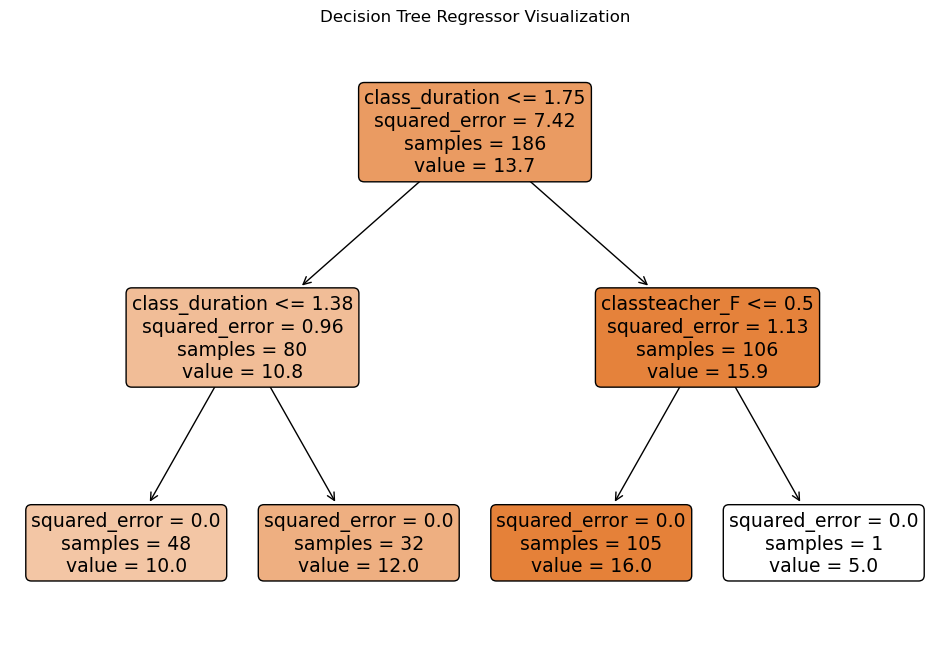

In [382]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_regressor, filled=True, feature_names=list(X_train.columns), class_names=['classcost'], rounded=True, proportion=False, precision=2)
plt.title('Decision Tree Regressor Visualization')
plt.show()

In [391]:
rf_classifier = RandomForestRegressor(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

rf_r2_score = r2_score(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)


0.0

In [393]:
print(rf_r2_score)
print(rf_mse)
print(rf_mae)

0.823
0.23
0.33


In [394]:
categories = ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest']
values = [linear_r2_score, ridge_r2_score, dt_r2_score, rf_r2_score]

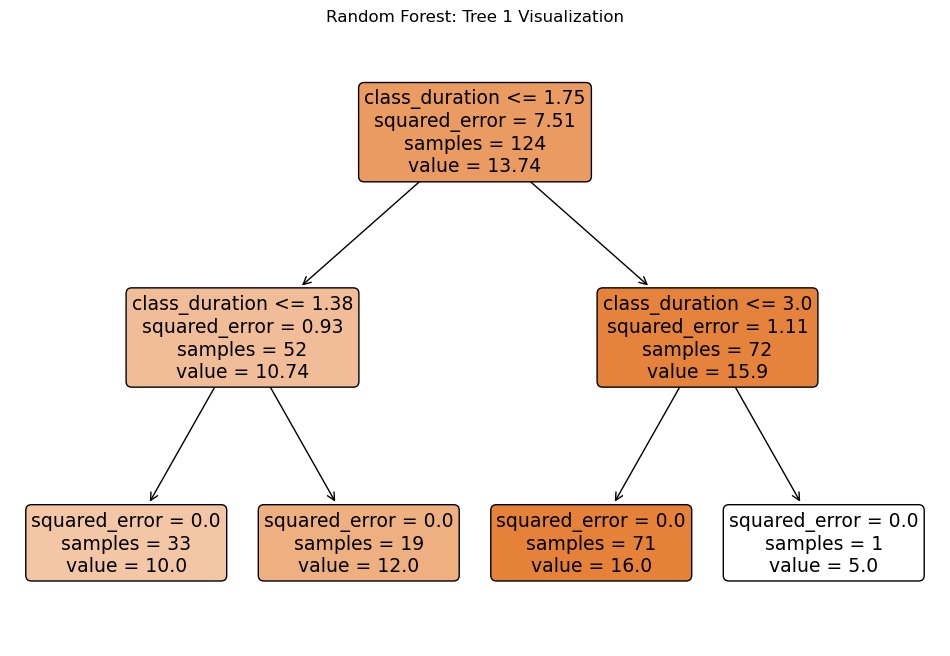

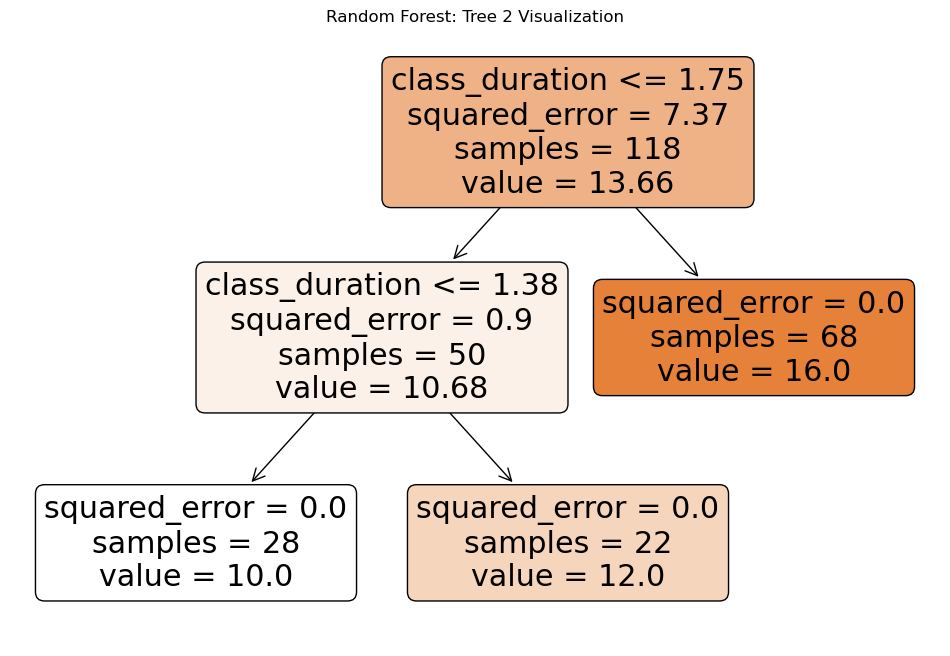

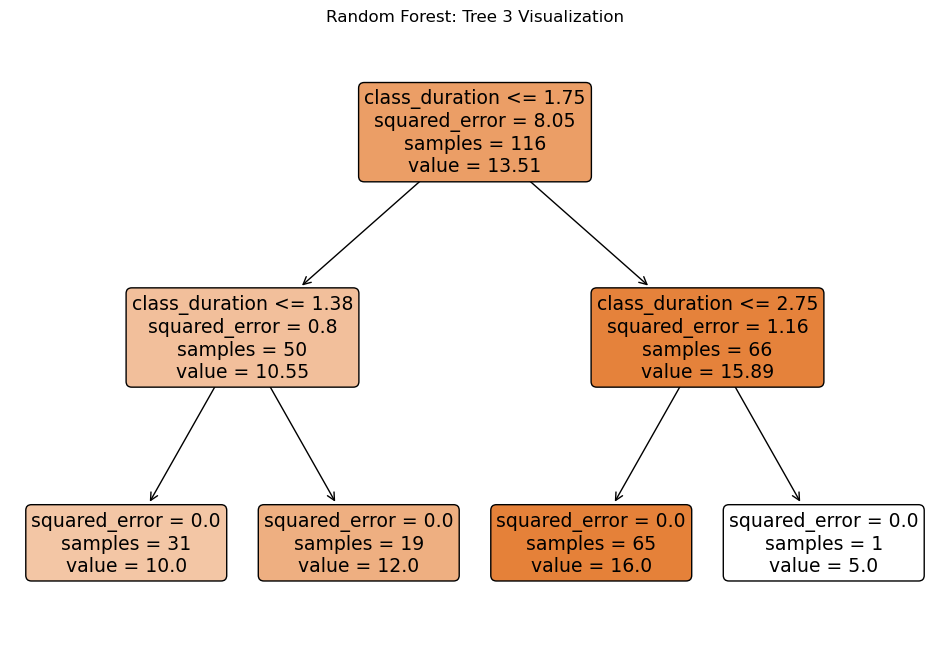

In [387]:
n_trees_to_plot = 3  # You can change this to plot more trees

for i in range(n_trees_to_plot):
    plt.figure(figsize=(12, 8))
    plot_tree(rf_classifier.estimators_[i], filled=True, feature_names=list(X_train.columns), class_names=['classcost'], rounded=True, proportion=False, precision=2)
    plt.title(f'Random Forest: Tree {i+1} Visualization')
    plt.show()

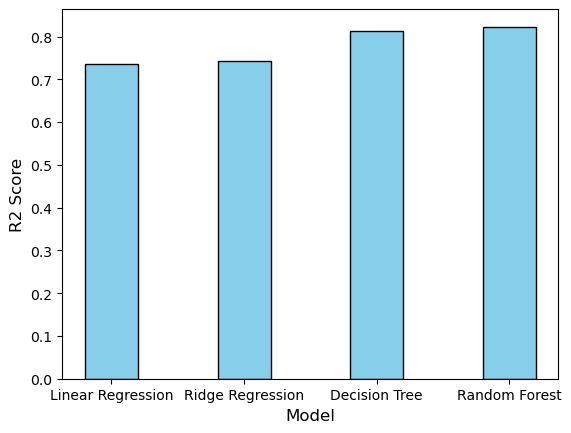

In [316]:
plt.bar(categories, values, color='skyblue', edgecolor='black', width=0.4)

plt.xlabel('Model', fontsize=12)
plt.ylabel('R2 Score', fontsize=12)

plt.show()

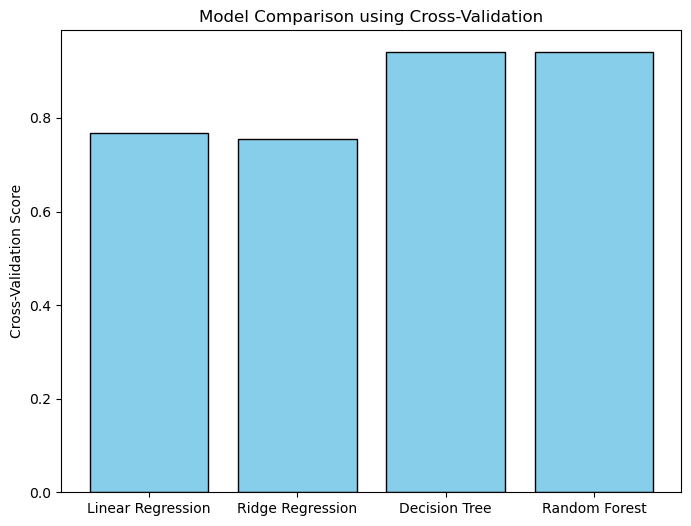

In [372]:
from sklearn.model_selection import cross_val_score

models = [linear_model, ridge_model, dt_regressor, rf_classifier]
model_names = ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest']

cross_val_scores = [cross_val_score(model, X, y, cv=5).mean() for model in models]

plt.figure(figsize=(8, 6))
plt.bar(model_names, cross_val_scores, color='skyblue', edgecolor='black')
plt.ylabel('Cross-Validation Score')
plt.title('Model Comparison using Cross-Validation')
plt.show()